<a href="https://colab.research.google.com/github/nimeshayasith/Computer_vision_Assignment/blob/main/4624_Question_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- STEP 1: RECONNECT GOOGLE DRIVE (Fixes Error 107) ---
from google.colab import drive
import os

# Force a remount to re-establish the broken connection
drive.mount('/content/drive', force_remount=True)

# Point back to your project folder
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path):
    os.chdir(project_path)
    print("Drive reconnected and directory set successfully!")
else:
    print("Drive mounted, but folder not found. Please check your folder name.")

Mounted at /content/drive
Drive reconnected and directory set successfully!


In [ ]:
import os

# Update this path if you named your folder something else
project_path = '/content/drive/MyDrive/CV_Assessment_01'

# Change the current working directory
os.chdir(project_path)

# Verify you are in the right place
print("Current Working Directory:", os.getcwd())
print("Files in Dataset folder:", os.listdir('Dataset'))

Current Working Directory: /content/drive/MyDrive/CV_Assessment_01
Files in Dataset folder: ['IPCV_ ASSIGNMENT_01_DATABASE.zip', 'IPCV_ ASSIGNMENT_01_DATABASE']


Performing Haar Wavelet Decomposition...
Zeroing out high-frequency details...
Reconstructing image...


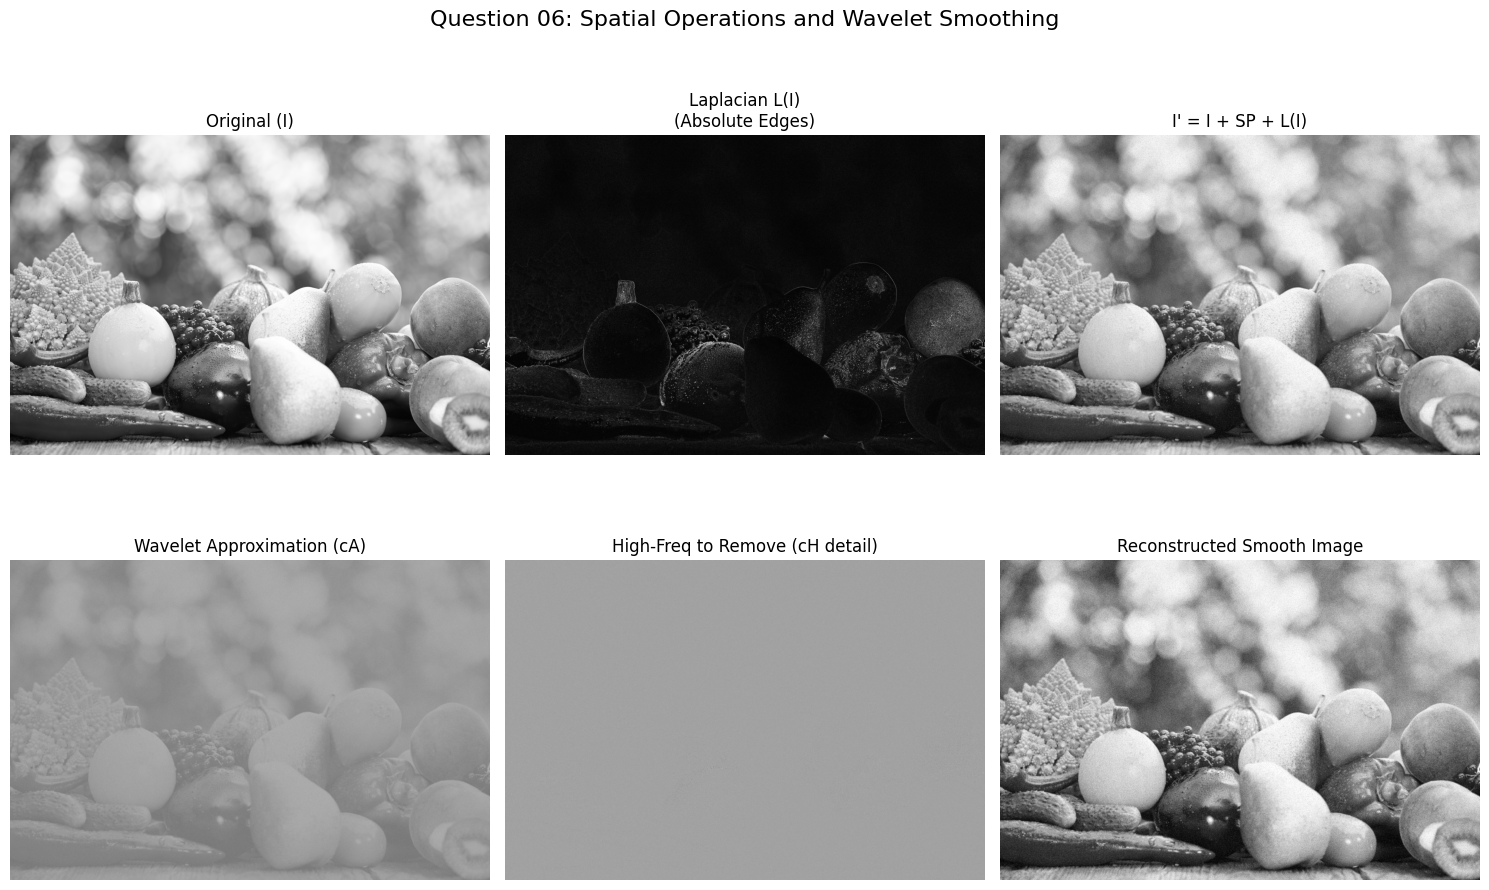

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import random

# --- 1. Load the Image ---
img_3_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Images_ For_Preliminary_Part/Image_3.jpg'
I_raw = cv2.imread(img_3_path, cv2.IMREAD_GRAYSCALE)

if I_raw is None:
    print(f"Error: Could not load {img_3_path}. Please check if the file exists and the path is correct.")
else:
    # Convert to float64 for mathematical operations
    I = I_raw.astype(np.float64)

    # --- 2. Calculate Laplacian L(I) ---
    L_I = cv2.Laplacian(I, cv2.CV_64F, ksize=3)

    # --- 3. Generate pure SP Noise array ---
    SP = np.zeros_like(I)
    h, w = I.shape
    noise_ratio = 0.05 # 5% noise
    num_noise = int(h * w * noise_ratio)

    indices = random.sample(range(h * w), num_noise)

    # THE FIX: Use .ravel() to get a view, NOT .flatten() which makes a detached copy
    SP_view = SP.ravel()
    for i, idx in enumerate(indices):
        # Add positive noise (salt) and negative noise (pepper)
        SP_view[idx] = 255 if i < (num_noise / 2) else -255

    # --- 4. Perform the Operation: I' = I + SP + L(I) ---
    I_prime = I + SP + L_I
    # Clip for display and subsequent processing
    I_prime_disp = np.clip(I_prime, 0, 255).astype(np.uint8)

    # --- 5. Wavelet Decomposition (Haar) ---
    print("Performing Haar Wavelet Decomposition...")
    coeffs = pywt.dwt2(I_prime, 'haar')
    cA, (cH, cV, cD) = coeffs

    # --- 6. Remove High-Frequency Components ---
    print("Zeroing out high-frequency details...")
    cH_zero = np.zeros_like(cH)
    cV_zero = np.zeros_like(cV)
    cD_zero = np.zeros_like(cD)

    # --- 7. Reconstruct the Smooth Image (Inverse DWT) ---
    print("Reconstructing image...")
    I_reconstructed = pywt.idwt2((cA, (cH_zero, cV_zero, cD_zero)), 'haar')
    I_reconstructed_disp = np.clip(I_reconstructed, 0, 255).astype(np.uint8)

    # --- PLOTTING FOR REPORT ---
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle("Question 06: Spatial Operations and Wavelet Smoothing", fontsize=16)

    # Top Row: Spatial Operations
    axes[0, 0].imshow(I_raw, cmap='gray')
    axes[0, 0].set_title("Original (I)")
    axes[0, 0].axis('off')

    # THE FIX: Use absolute values to properly visualize the Laplacian edges
    L_disp = cv2.convertScaleAbs(L_I)
    axes[0, 1].imshow(L_disp, cmap='gray')
    axes[0, 1].set_title("Laplacian L(I)\n(Absolute Edges)")
    axes[0, 1].axis('off')

    axes[0, 2].imshow(I_prime_disp, cmap='gray')
    axes[0, 2].set_title("I' = I + SP + L(I)")
    axes[0, 2].axis('off')

    # Bottom Row: Wavelet Processing
    axes[1, 0].imshow(cA, cmap='gray')
    axes[1, 0].set_title("Wavelet Approximation (cA)")
    axes[1, 0].axis('off')

    # Displaying the noisy Horizontal detail coefficients before we zero them out
    axes[1, 1].imshow(cH, cmap='gray')
    axes[1, 1].set_title("High-Freq to Remove (cH detail)")
    axes[1, 1].axis('off')

    axes[1, 2].imshow(I_reconstructed_disp, cmap='gray')
    axes[1, 2].set_title("Reconstructed Smooth Image")
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()